# Visualisation in Pycharm

There are a number of options to create visualisations in Python - we will work with _Matplotlib_. As the name suggests, this provides plotting functionality very similar to Matlab.

There are a number of options for how the overall style of the plot looks, and as I plot different figures I will change the style to demonstrate different ones. Which style you end up choosing is down to personal taste!

I also note that I am only highlighting the basics of the plotting functionality here. There are a host of functions and methods to tailor the plots to look exactly as you desire.

You can check out the Matplotlib gallery to get ideas of what can be achieved: [https://matplotlib.org/gallery/index.html]

We will work in the newly created file, _main.py_. At the top of the file, we will import the modules we will need by entering the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


**Note** The following instructions are tailored to working in Pycharm. If running python straight from the command line you have some additional flexibility with plotting.  

# Line plots
We can now create a simple plot that will appear as a pop-up window in a separate tab within Pycharm.

Enter the following code in _main.py_

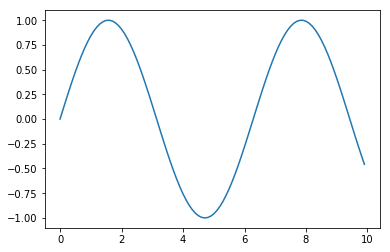

In [2]:
x=np.arange(0,10,0.1) # array from 0 to 10 in steps of 0.1
y=np.sin(x)
plt.plot(x,y)
plt.show()  #This command is required to make the plot appear


We can add another line to the plot. Replace the previous plotting code with:

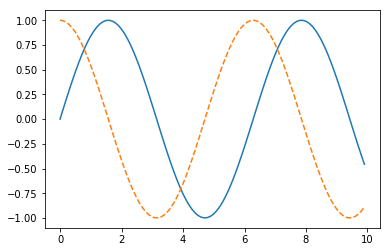

In [3]:
x=np.arange(0,10,0.1) # array from 0 to 10 in steps of 0.1
y=np.sin(x)
y2=np.cos(x)
plt.plot(x,y,'-')
plt.plot(x,y2,'--')
plt.show()

You can see that if we keep making calls to plt.plot(), then the results will be over-plotted on the open figure window. You should also notice that I selected the style of the line with the dashes between the quotation marks.

The colour of the plot lines is automatically chosen but can be adjusted manually.

We can save our figure by adding the following line of code above plot.show()

In [4]:
#plotting code
#.....

plt.savefig('myfigure.png')
plt.show()

If no filepath is specified, e.g., '*my\_folder/pictures/myfigure.png*' then the above command just saves to the directory in which you launched Python (the current working directory).

***

## Multi-panel plots

You can also create multiple subplots in a figure.

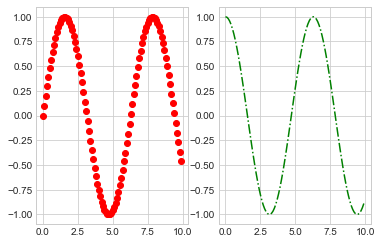

In [5]:
plt.style.use('seaborn-whitegrid') # Change plot theme

plt.figure()  # Create a plot figure

#Create first panel of plot
plt.subplot(1,2,1) # (rows, columns, panel number)
plt.plot(x,y,'ro') # 'ro' gives red dots

plt.subplot(1,2,2)
plt.plot(x,y2,linestyle='dashdot',color='g') # alternative method for specifiying 
                                             # color and line-style

plt.show()

However, the best option might be to create a Figure object. First, we create the new figure and then add subplots to it.

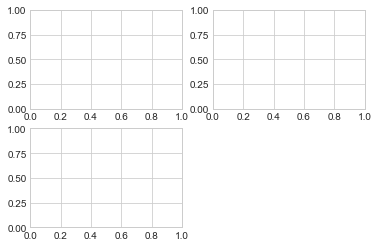

In [6]:
fig=plt.figure() #create figure object

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

If we tried to add a plot now using _plt.plot()_ then only the last plot is filled.

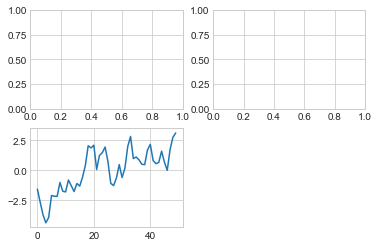

In [7]:
fig=plt.figure() #create figure object

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum())

To plot to a specific subplot, you need to use each subplots instance method:

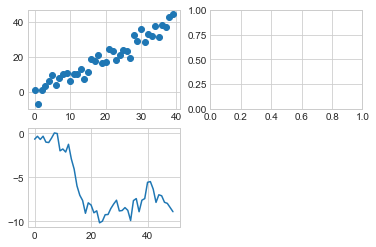

In [8]:
fig=plt.figure() #create figure object

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum())

ax1.scatter(np.arange(40),np.arange(40)+3*np.random.randn(40))

## Adding information

You can customise any of the plots in an almost limitless number of ways. For example, you may want to change the axis ranges, or add titles to the axis and graph. We can achieve this with a variety of in-built plot methods.

All matplotlib functions (e.g., plot, hist, scatter) can all be modified with the same methods.

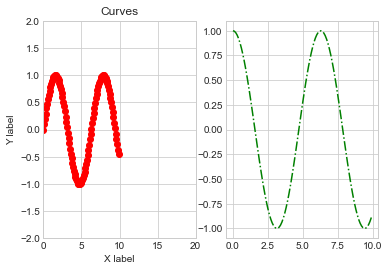

In [9]:
plt.figure()  # Create a plot figure

#Create first panel of plot
plt.subplot(1,2,1) # (rows, columns, panel number)
plt.plot(x,y,'ro') # 'ro' gives red dots
plt.xlim(0,20)     # changes x axis range
plt.ylim(-2,2)     # changes y axis range
plt.xlabel('X label')    # Adds a label to the x axis
plt.ylabel("Y label")    # Adds a label to the y axis
plt.title('Curves')      # Adds a title to the plot

plt.subplot(1,2,2)
plt.plot(x,y2,linestyle='dashdot',color='g') # alternative method for specifiying 
                                             # color and line-style

plt.show()

It is also possible to add a legend to the chart, but labels need to specified when calling plot.

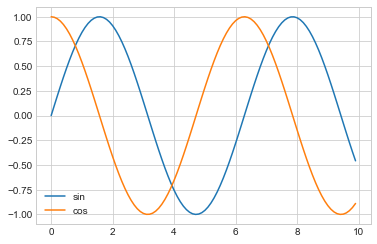

In [10]:
fig=plt.figure()  # Create figure object
plt.plot(x,y,label='sin')  # Need to specify label here for legend
plt.plot(x,y2,label='cos')
plt.legend();
plt.show()

In [11]:
plt.style.use('seaborn') # Change plot theme

***

# Plotting errors

Any plot of scientific measurement data should also convey the uncertainties with each measurement. So we should know how to plot error bars on our data. 

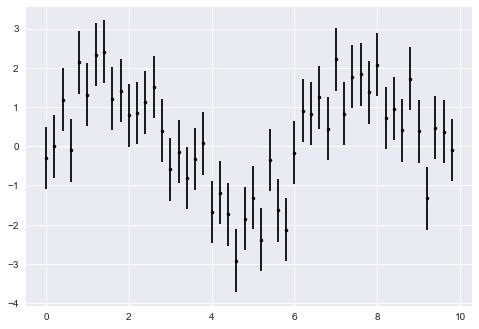

In [12]:
x=np.arange(0,10,0.2)
dy=0.8
y=np.sin(x)+dy*np.random.randn(50) # Adds Guassian noise into the data

plt.errorbar(x,y,yerr=0.8,fmt='.k'); # fmt is a format code that controls 
                                    # appearence of lines & points
plt.show()

You can change the features of the error bars to make the plot more appealing.

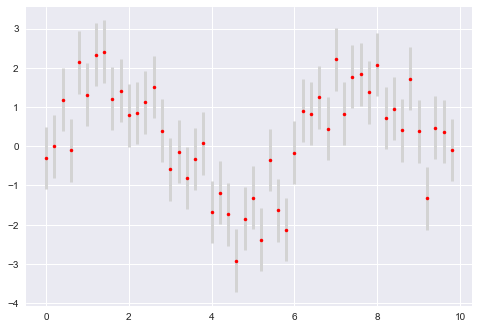

In [13]:
plt.errorbar(x,y,yerr=0.8,fmt='.',color='red',ecolor='lightgray',elinewidth=3)
plt.show()

There is further flexibility for horizontal error bars, one sided errors, etc.



# Scatter plots

While you can create scatter plots with the *plot* function, a more powerful option is *plt.scatter* .

This function enables you to control various aspects of each individual point, such as colour and size, to enable multi-dimensional information to be shown 

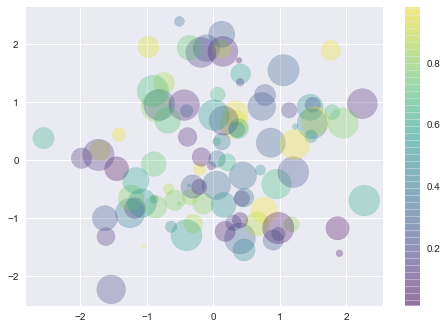

In [14]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
plt.show()

Note that the color argument in *scatter* is automatically linked to the colourbar. Also, the size of the data point is given in pixels. Finally, to make all the overlapping data points visible we have changed the transparency of the plot using the *alpha* argument. 

# Contour plots

You may be working with three dimensional data (e.g. an image) and want to explore the data in two dimensions. One way to do this is with contour plots.

Let us first define some 3D function to work with, which is of the form $z=f(x,y)$. We will use function in python to do the calculations for us. Functions will be discussed in detail next week - for now don't worry too much about the details.

In [15]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)


We will now plot the output of the function as a contour plot. To do this, we need to define a grid of values for x and y and z.

The easiest way to do this is to use a function called _np.meshgrid_ (some of you may recognise the name from Matlab!).

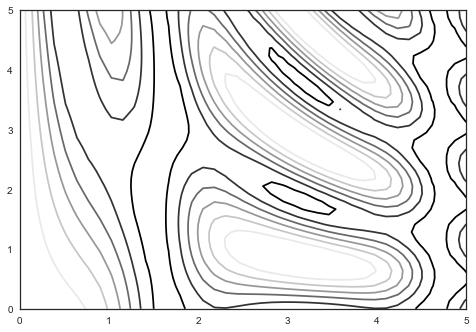

In [16]:
plt.style.use('seaborn-white')

x=np.linspace(0,5,40)  # Create 1 dimensional array
y=np.linspace(0,5,40)

X,Y=np.meshgrid(x,y)

Z=f(X,Y)

plt.contour(X,Y,Z)
plt.show()

Of course, there is flexibility to play with various features of the plot, e.g. change the contour spacing, change the colour.

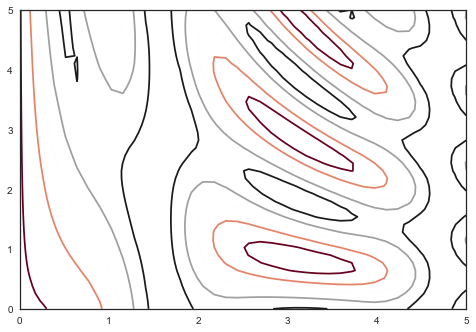

In [17]:
plt.contour(X,Y,Z,5,cmap='RdGy')
plt.show()

You may want to fill the contours instead:

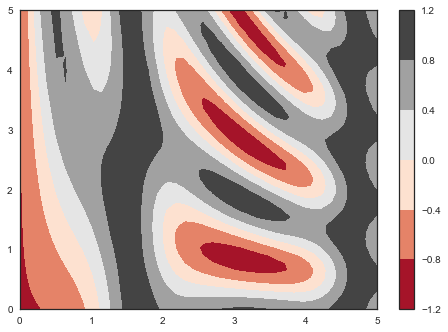

In [18]:
plt.contourf(X,Y,Z,5,cmap='RdGy')
plt.colorbar();
plt.show()

Another way to show such data is to use the _imshow_ function, which interprets a 2D grid of data as an image.

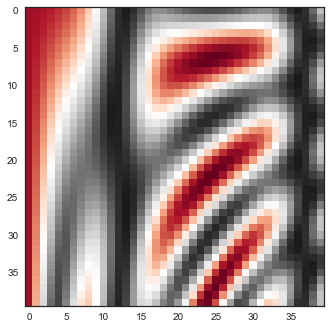

In [19]:
plt.imshow(Z,cmap='RdGy')
plt.show()

You can see this image is plotted upside down! When using imshow, the origin is placed in the top left corner. To show the figure in the standard orientation, you should use the origin keyword.

Also, imshow doesn't accept the x and y grid. Hence, you have to give instructions about the extent of the image.

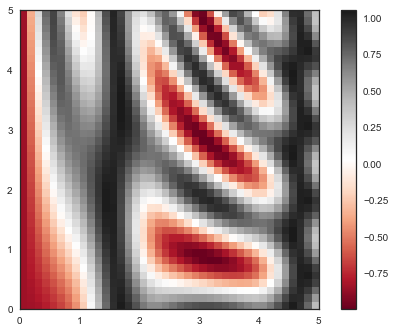

In [20]:
plt.imshow(Z,cmap='RdGy',origin='lower',extent=[0,5,0,5])
plt.colorbar()
plt.show()

# Histograms

Histograms are a vital tool in probing data-sets. They show us the distribution of the quantity of interest and often inform how further analysis should proceed.

In [21]:
plt.style.use('ggplot')

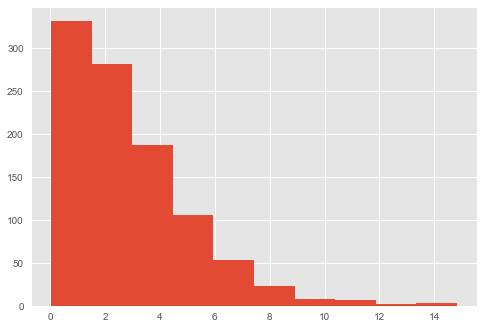

In [22]:
data_chisq=np.random.chisquare(3,1000) # Draw 1000 random values from a chi-squared 
                                       # distribution with 3 degrees of freedom

plt.hist(data_chisq)
plt.show()

The histogram function has a very basic when it comes to binning the data. The default value is 10 bins. 

The bin size of histograms is important as it can hide or reveal details. If the bin size is too coarse, then distinct features (peaks or troughs) can be obscured. If the bin size if too sparse, then we don't have enough information in each bin.

Fortunately, the bin size can be adjusted. The size can be specified 'by hand' by changing the number of bins. However, there is likely an optimal choice of bin size that balances to much versus to little detail. The optimal choice is not straightforward to calculate, however a few formulae have been derived that try to give a guide.
For example there is [Sturge's Rule, Scott's Rule, Square root](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width). You are able to implement some of these with the latest versions of matplotlib and numpy.

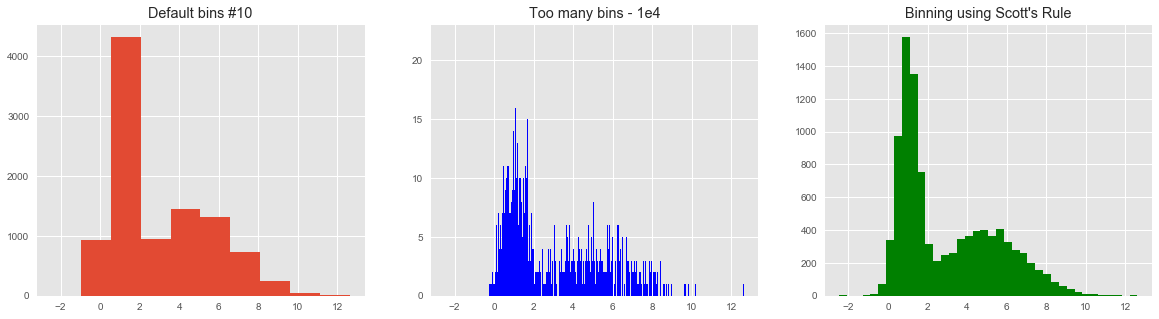

In [23]:
peak1=np.random.randn(5000)*2.+5 # Draw 10000 values from a normal distriburtion
peak2=np.random.randn(5000)*0.5+1

combined_data=np.concatenate([peak1,peak2])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(combined_data) # default bin value
plt.title('Default bins #10')

plt.subplot(1,3,2)
plt.hist(combined_data,color='b',bins=5000) # default bin value
plt.title('Too many bins - 1e4')

plt.subplot(1,3,3)
plt.hist(combined_data,bins='scott',color='g') # default bin value
plt.title("Binning using Scott's Rule")
plt.show()

## Over-plotting multiple histograms

It is also possible to over-plot multiple histograms. Here we use the density keyword to show the probablity density function instead of the counts.

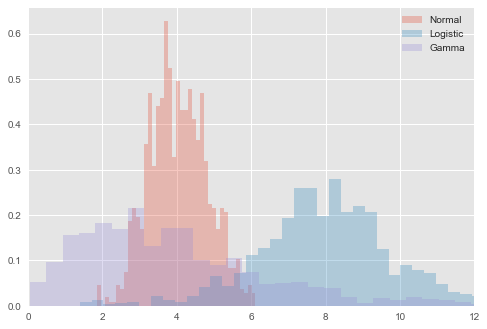

In [24]:
x1=np.random.normal(0,0.8,1000)+4   # Draw random samples from a normal distribution
x2=np.random.logistic(8,1,1000)     # Draw random samples from a logistic distribution
x3=np.random.gamma(2,2,size=1000)   # Draw random samples from a gamma distribution

kwargs=dict(alpha=0.3,density=True,bins=40) #provide keywords as a dictionary
plt.hist(x1,**kwargs,label='Normal')
plt.hist(x2,**kwargs,label='Logistic')
plt.hist(x3,**kwargs,label='Gamma')

plt.xlim(0,12)
plt.legend()

plt.show()

## Changing tick values

The histogram for the $\chi^2_3$ (chi-squared with 3 degrees of freedom) data has a rather ugly set of tick labels. Of course, it s possible to change these to your taste.

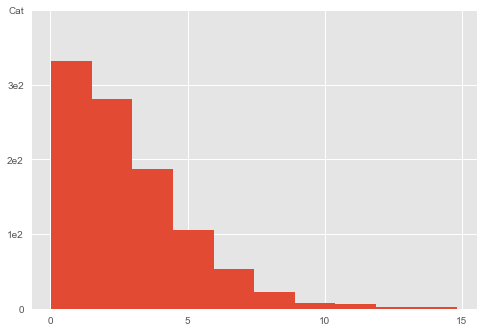

In [26]:
plt.hist(data_chisq)

x_tick_vals=[0,5,10,15]
plt.xticks(x_tick_vals)

y_tick_vals=[0,100,200,300,400]
y_tick_labels=['0','1e2','2e2','3e2','Cat']
plt.yticks(y_tick_vals,y_tick_labels)

plt.show()

## Two-dimensional histograms

It is also possible to create histograms in two dimensions, dividing points in two dimensional bins. This shows the joint probability distribution.

Here is an example of how to do this. We create data from a [multivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

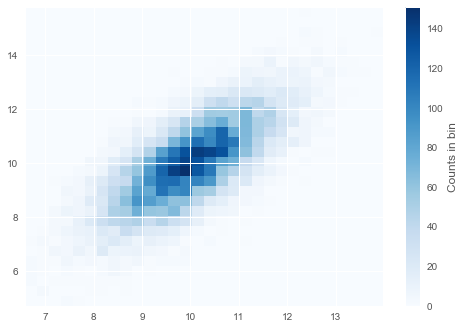

In [27]:
mean=[10,10]      # means
cov=[[1,1],[1,2]] # covariances

x,y=np.random.multivariate_normal(mean,cov,10000).T

plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label('Counts in bin')
plt.show()

# Fitting data

One key part of almost any analysis is fitting a model to your data. The simplest form of this is fitting a function using a least-squares method.

Note that the least-squares method makes the implicit assumption that your data has normally distributed errors.

With this in mind, we will create some fake data and use one of the optimisation routines in _scipy_ to fit a model to our data.

There are a number of other modules that can also perform model fitting (e.g. astropy).

In [ ]:
from scipy.optimize import curve_fit # a least-squares curve fitting tool

Our data will be a sin curve with noise drawn from a normal distribution.

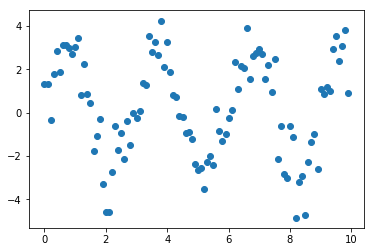

In [9]:
#Create a sin surve with noise
x=np.arange(0,10,0.1)
data=3.*np.sin(x*2.*np.pi/3)
noise=np.random.RandomState(10).normal(size=100)
y=data+noise

plt.scatter(x,y)

Now, we have to set up a function which defines our model we want to fit. (We will discuss functions further in the next lecture.)

In [27]:
# define model to fit with parameters a and b
def sin_func(x,a,b):
    return a*np.sin(x*2.*np.pi/b)


Then, we pass the model function, the x and y values for our data and an initial guess for the model parameters to *curve_fit*.

[2.92169545 2.99925415]


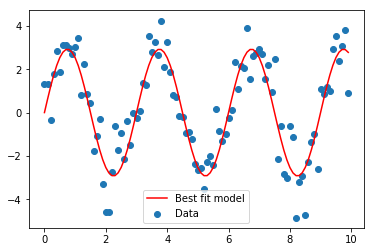

In [30]:
popt, pcov = curve_fit(sin_func, x, y,p0=[4,3.5])
# popt - best guess for model parameters
# pcov - error on model parameters
# p0 - initial guess for parameters

print(popt)
plt.scatter(x,y,label='Data')
plt.plot(x,sin_func(x,*popt),'r',label='Best fit model')
plt.legend()
plt.show()

I note that curve_fit is not a great choice in general for fitting models. This is because you need to have a reasonably good guess for your initial parameters. This is fine if you just want to fit one model to one data set. However, it is common to want to fit a model to many data sets - in this case using *curve_fit* becomes tedious!